# Welcome to my notebook!

## What is this notebook about?

Welcome to Nigar's first preliminary analysis notebook! Ok, let's switch back to first person. 

In this notebook, I will be working on an image analysis pipeline for the images that I obtain using HoloMonitor microscope, which I use to image the cells that I grow in the lab. 

The goal of this notebook is to: 
- load images 
- smooth out cells using a Gaussian filter with a mean equal to ca a size of a single cell 
- more or less cleanup the images so that we only have cells visible 
- obtain a velocity map of the cells 

## Code and data 

Let's import all of the necessary libraries and load in our images. This might take a while depending on the size and number of images, so we keep the import of images-stage in one cell. 

In [16]:
import os
import matplotlib.pyplot as plt  # plotting
import numpy as np  # numerics
from skimage import io
from natsort import natsorted
#import skimage.io
import skimage.color
import skimage.morphology
import skimage.measure as sm

from skimage.io import imread
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from skimage import (io, filters,  morphology, measure, segmentation, feature, util, exposure)
from scipy.ndimage import gaussian_filter 
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom

In [8]:
# Load multiple images. Example taken from https://scikit-image.org/docs/dev/user_guide/getting_started.html

plt.rcParams['figure.figsize'] = [10,10]

# list_files = os.listdir('./400khz/')
#list_files = natsorted(list_files)
# print(len(list_files))

folder_path = './Images/MDCK-pos1/'
list_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)]
list_files = natsorted(list_files)
image_list = []
# Filename fc2_save_2023-03-22-182010-0NNN.tif
for filename in list_files:
    image_list.append(io.imread(filename))

Now, let's visualise some of these images!

[[ 88  95  97 ... 154 154 154]
 [ 75  91 100 ... 145 148 150]
 [ 40  70  97 ... 138 136 136]
 ...
 [ 29  22  22 ...  93 100 111]
 [ 29  20  22 ... 111 120 127]
 [ 36  29  27 ... 129 145 145]]


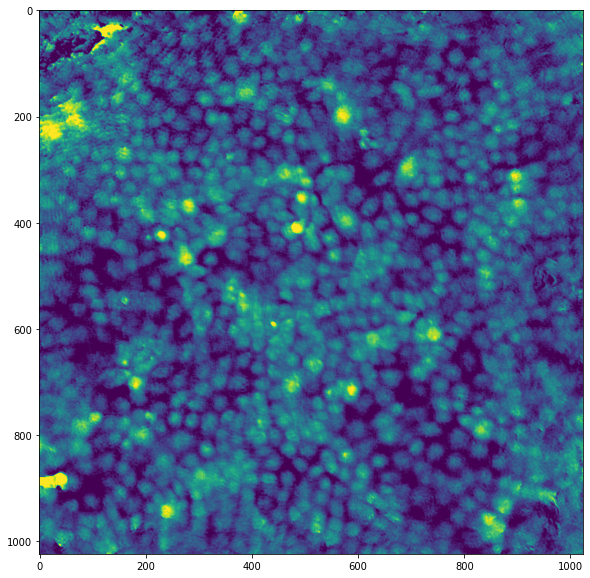

In [42]:
plt.imshow(image_list[0]) #plotting the very first image here to see what it looks like

I am quite unhappy with the top left corner, so I would like to crop the image and only focus on the middle of the image. This would mean ca 300-800 pixels on y-axis and 200-700 pixels on x-axis.

500


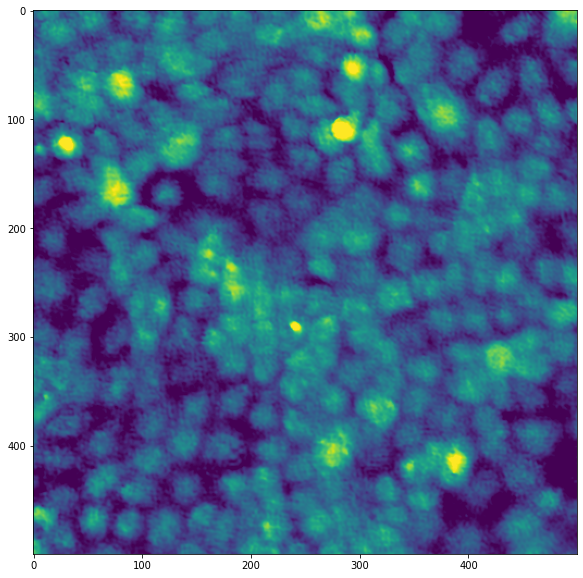

In [46]:

cropped_image = image_list[0][300:800, 200:700]
plt.imshow(cropped_image)
print(len(cropped_image[:]))

Much nicer! Now, let's try to smooth out the image. I will use a Gaussian filter with a mean equal to ca a size of a single cell. I will use a mean of 10 pixels.

(500, 500)


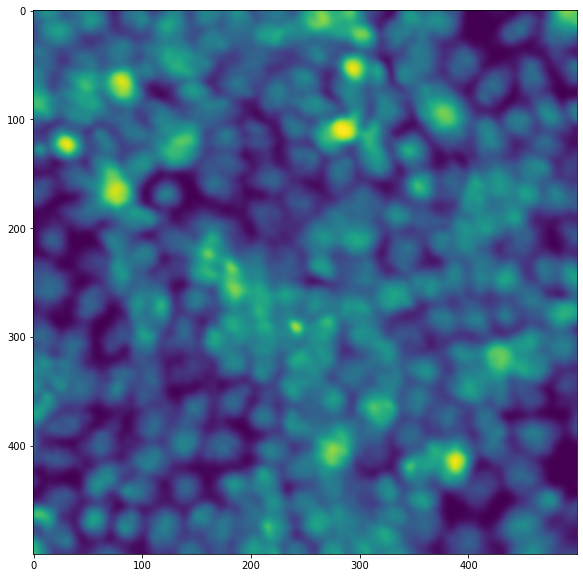

In [36]:
img = cropped_image

print(img.shape)

img_gau = filters.gaussian(img, sigma = 3)
plt.imshow(img_gau)

In [40]:
#print out intensity values of the image before and after filtering - but are these really intensities...? Need to figure out!

print('Before filtering: ', cropped_image[0])
print('After filtering: ', img_gau[0])

Before filtering:  [118 110 100  90  90  98 106 118 138 152 154 152 148 142 136 134 136 136
 132 132 138 136 126 114 104  96  90  92 100 106 104 100  98 100 104 106
 102  98 102 112 118 116 120 122 120 114 116 128 138 140 142 140 132 124
 122 120 114 104  96  94  96  96  96  96  92  88  84  78  66  58  52  43
  29  19  23  39  50  48  46  50  54  54  58  74  90  96  96  98 102 104
 104 102 102 104 110 118 128 128 120 112 104  94  88  84  80  68  54  52
  62  68  62  54  54  60  70  78  82  74  72  80  92 100 110 122 130 134
 134 126 114 108 114 128 132 124 116 112 106  92  82  80  82  80  72  68
  70  76  86  94  98  94  92  98 106 114 122 130 132 132 132 134 132 126
 120 120 122 126 130 130 122 112 108 110 110 102  94 100 108 104  96  96
 110 122 126 132 140 140 136 136 144 146 134 122 122 124 118 106  98  90
  78  70  70  74  68  58  62  80  94  92  90 100 110 110 100  96  96  94
  84  76  90 104 108 110 114 116 112 110 108 108 110 110 108 104 104 104
 102  94  82  74  68  62  60  66

### So, future Nigar, here are some things to do:
- figure out the deal with intensity values
- maybe do some other type of filtering: lowpass?
- check the time step between each image was taken: might be useful for velocity field plotting 
- get started on the velocity field plotting